# WORLD HAPPINESS REPORT

# Data Description

On March 20th, the world celebrates the International Day of Happiness. On this day, in 2017, the UN also release the World Happiness Report - a ranking of which countries in the world could be considered as "happy". This report contains about 158 countries from each continent to construct an understanding of which countries may be the happiest. This ranking is revered across the globe, as it could be an indication of the country's policy-making decision skills. Experts around the world ( in economy, psychology, and foreign affairs) have noted that these scores may be a good indication of a country's progress

The dataset i am going to use contains different different variables.
Using these variables, we can then attempt to construct model which may help us predict the happiness score among the all 158 countries.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
whr=pd.read_csv('happiness_score_dataset.csv')

whr.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


This is the data at a glance, as we can see, the top 5 countries with the highest score from 2015–2017 are Switzerland, Iceland, Denmark, Norway, and Canada. 

In [3]:
whr.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Here we can see all the variables or features or columns name that i am going to use to make a model to predict the happines score as i mentioned above.

In [4]:
# pd.set_option('display.max_rows', None) to see all columns.
pd.set_option('display.max_rows', None)

In [5]:
whr.shape # checking the data dimension

(158, 12)

Here we can see that we have total 12 columns and 158 rows with different variables and values including target column.

In [6]:
whr.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
# Checking null values in dataset
whr.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

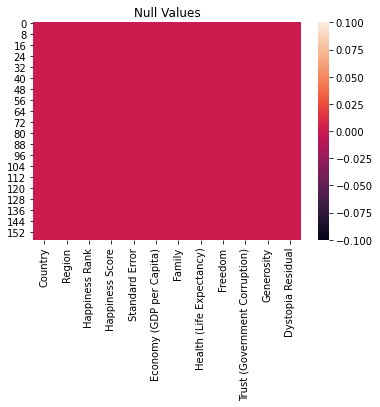

In [9]:
sns.heatmap(whr.isnull())
plt.title('Null Values')
plt.show()

There are no null values in dataset.

In [10]:

whr.duplicated().sum()

0

In [11]:
# Statical summary
whr.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This summery shows that the average score that a country received is around 5.37, the highest was 7.58, and the lowest score received was 2.83.

In [12]:
whr.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [13]:
whr.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [14]:
whr.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# Grouping

In [15]:
WHR_Region = whr.groupby('Region')

In [16]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


# Barplot of the happiness score

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

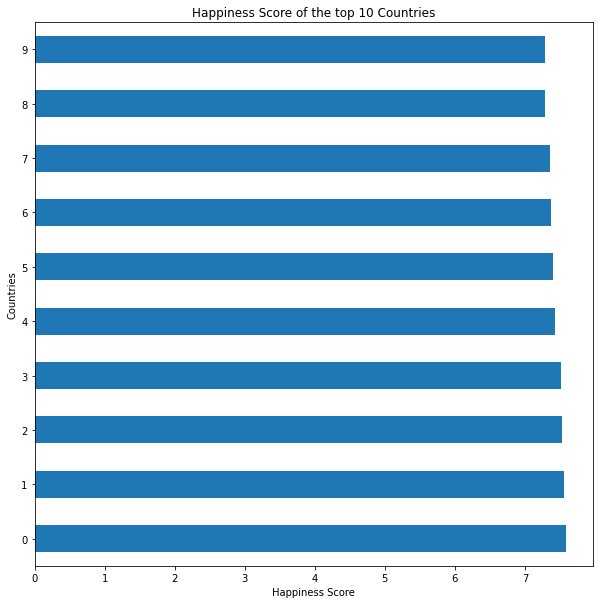

In [17]:
whr['Happiness Score'].head(10).plot(kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.ylabel("Countries")
plt.title('Happiness Score of the top 10 Countries')

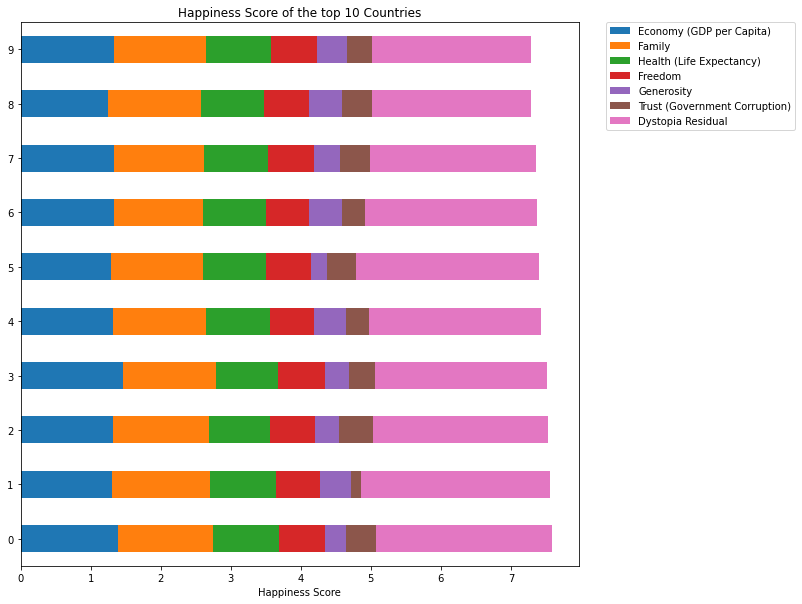

In [18]:

whr[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Histogram of Happiness Score

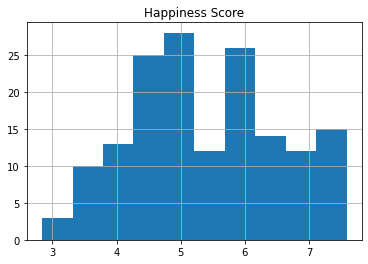

In [19]:
whr['Happiness Score'].hist(grid=True)
plt.title("Happiness Score")
plt.show()

# Pairwise Scatterplot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


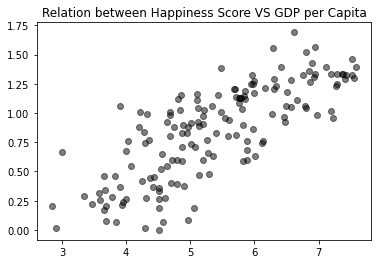

In [20]:
plt.scatter(whr["Happiness Score"],whr["Economy (GDP per Capita)"],alpha=0.5, c=(0,0,0)) # Example of Bivriate analysis
plt.title("Relation between Happiness Score VS GDP per Capita")
plt.show()

We can see that there ae positive relationship between these two variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


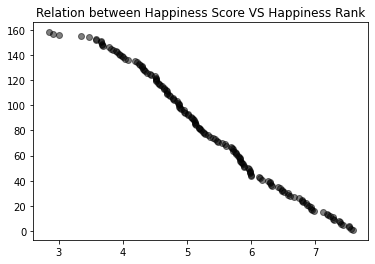

In [21]:
plt.scatter(whr["Happiness Score"],whr["Happiness Rank"],alpha=0.5, c=(0,0,0)) # Example of Bivriate analysis
plt.title("Relation between Happiness Score VS Happiness Rank")
plt.show()

# Obtaining Pair plots of the Happiness Score versus each of the other variables.

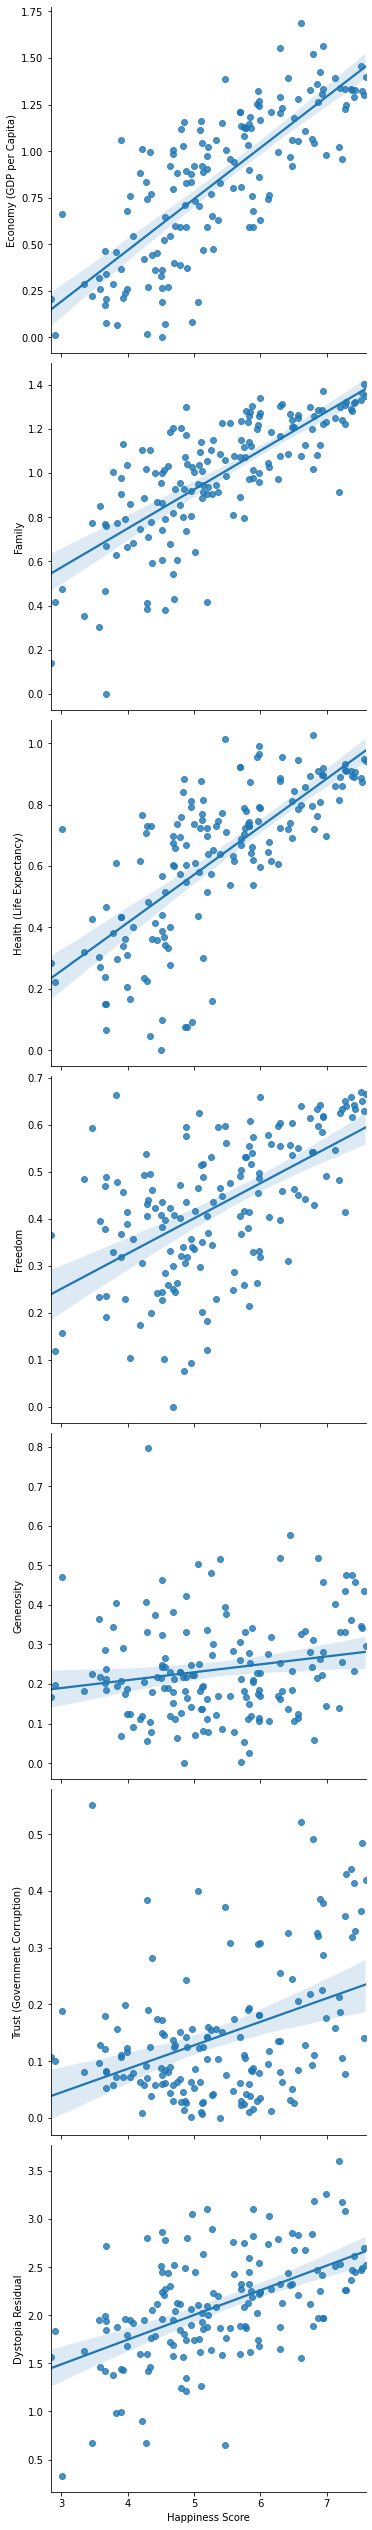

In [22]:
sns.pairplot(data=whr, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual'])

# Checking Correlation

Obtaining the correlation between the Happiness Score and each of the other variables.

In [23]:
whr.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

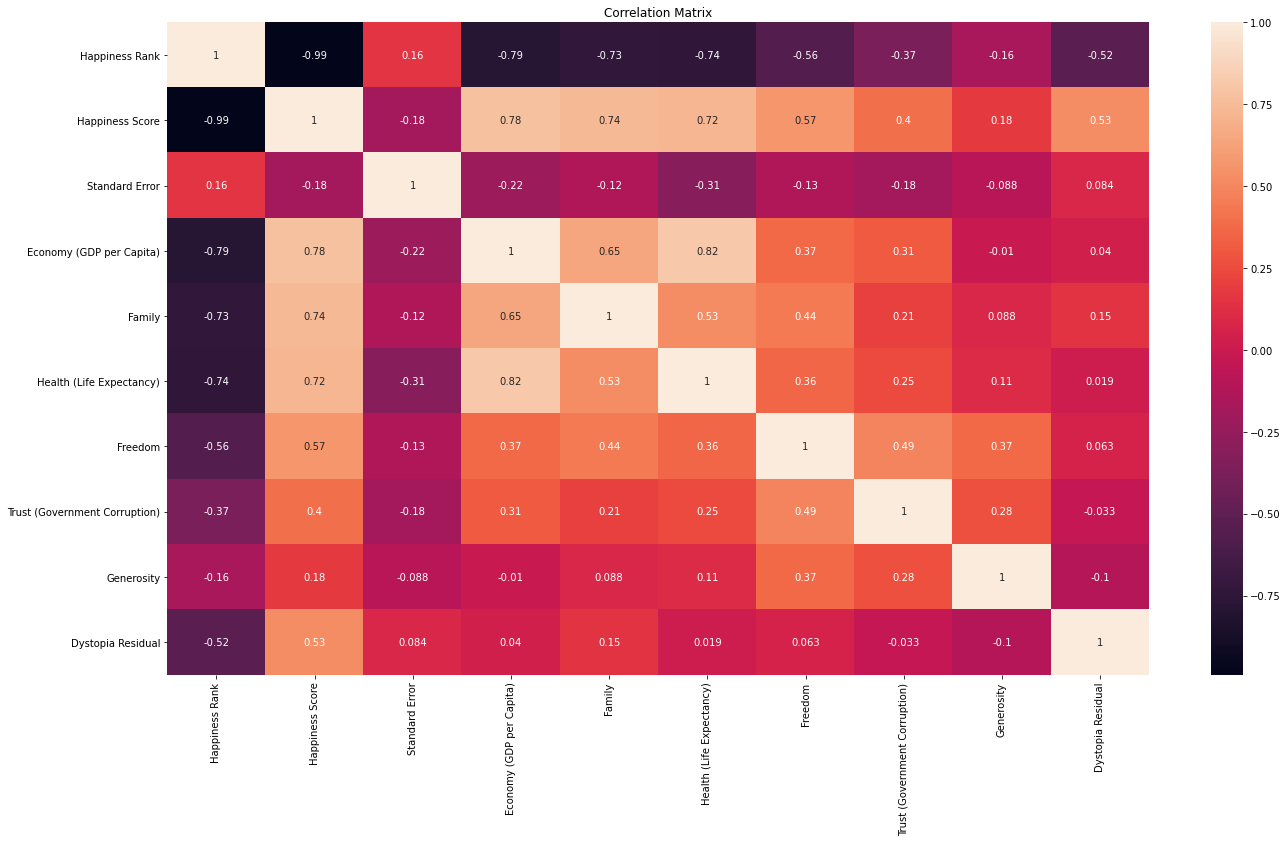

In [24]:
corr_mat=whr.corr() # Example of multivariate analysis

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Observation: we can see the top three variables that are highly correlated with Happiness Score are Economy(GDP per capita), Family and Health(Life Expectancy).

# Data Analysis Regionwise

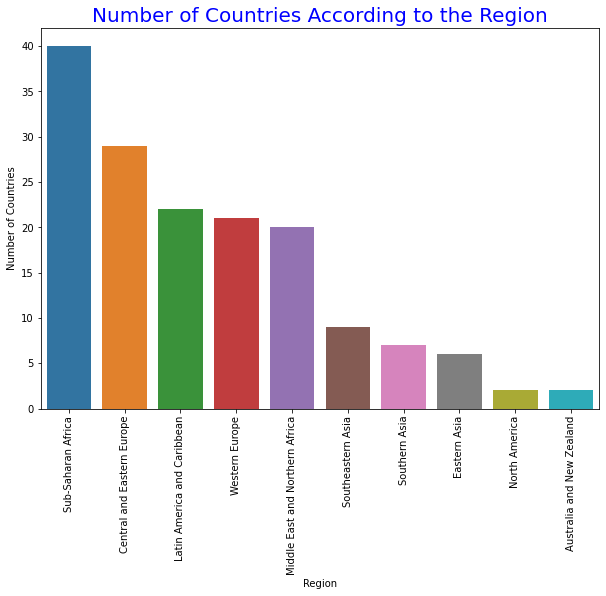

In [25]:
dt = whr.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = dt.index, y = dt.values)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
plt.show()

Observation: This barplot giving us idea of regionwise countries dtails that are participating.

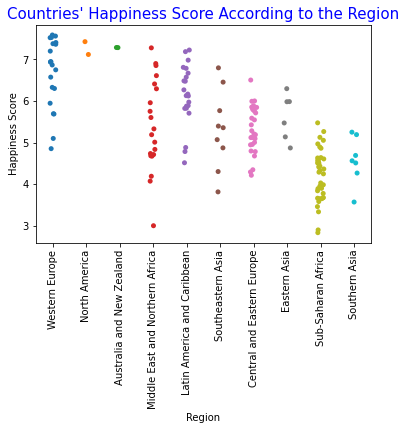

In [26]:
x = sns.stripplot(x = "Region", y = "Happiness Score", data = whr, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", color = 'blue', fontsize = 15)
plt.show()

This visuals show us regionwise happiness score.

# Probabilities

Computing the probability that randomly selected country with Happiness score over 6.0 is from Western Europe

In [27]:
whr[whr['Happiness Score'] > 6].shape[0]

44

In [28]:
whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')].shape[0]

16

In [29]:

float(len(whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')]))/float(len(whr[whr['Happiness Score'] > 6]))

0.36363636363636365

In [30]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format
      (float(whr[(whr['Happiness Score'] > 6) & (whr['Region'] == 'Western Europe')].shape[0]

)/float(whr[whr['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


# Checking Outliers

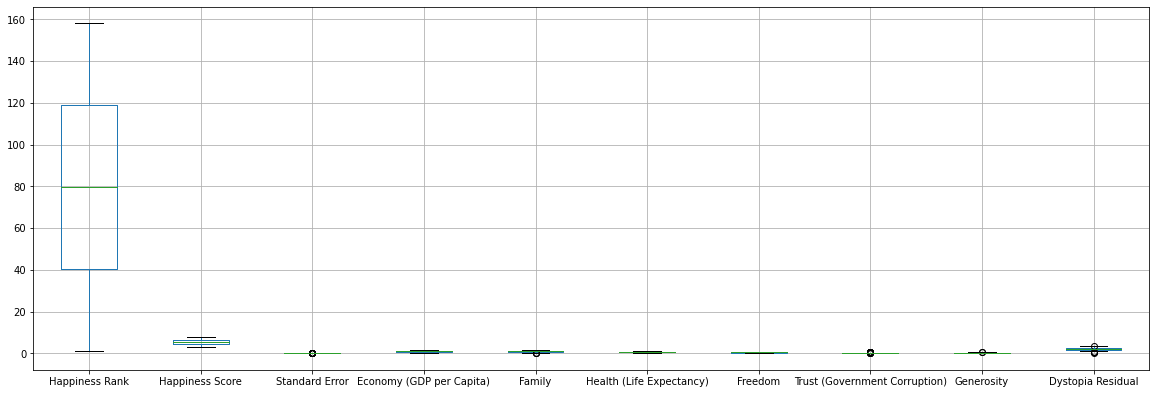

In [31]:
# Plotting boxplots for all columns
whr.iloc[:,0:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We can see one or two values for total 4 columns but those are very nearest to whiskers so these are not outliers.

# Let's check the data distribution among all the columns

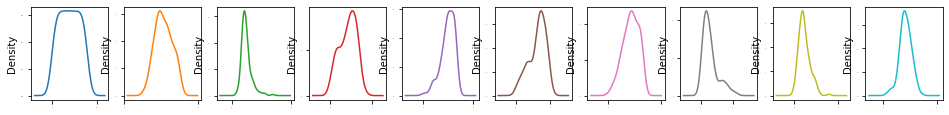

In [32]:
# multivariate analysis

whr.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in the for two columns. Later i will be dealing with these skewness.

# Droping Happiness Rank, Country, Region and Standard Error

Now we have an insight that there are no importtant role of these four columns in constructing a model. As we know that our target variable is happiness score and this happiness score is really strongly correlated with economy, and health, followed by family and freedom. That is why i am dropping these four columns (Happiness Rank, Country, Region and Standard Error).

In [33]:
new_whr = whr.drop(["Country", "Happiness Rank", "Region","Standard Error"], axis=1)
new_whr.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Splitting the independent nd target variable into x and y

In [34]:
x = new_whr.drop("Happiness Score", axis = 1)
y = new_whr["Happiness Score"]

In [35]:
# Checking skewness
x.skew()

# If you have any value for a variable positive or negative grater than 0.5 then there is skewness, you have to remove it.

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see skewness in dataset. We will remove the skewness using power_transform function.

In [36]:
from sklearn.preprocessing import power_transform
new_whr=power_transform(x)

whr=pd.DataFrame(new_whr,columns=x.columns)

In [37]:
whr.skew()

Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

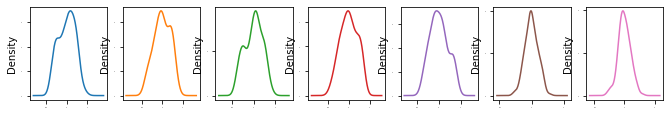

In [38]:
whr.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Observation: Skewnewss has been removed now.

# Finding Best Random State

In [39]:
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf= lm.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.9999999642713742 on Random_state 148


In [40]:
x.shape

(158, 7)

In [41]:
y.shape

(158,)

# Creating Train_Test_Split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=148)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 7)
(53, 7)
(105,)
(53,)


In [43]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [44]:

print("The number of coefficient in this model are", lm.coef_)

The number of coefficient in this model are [1.00016616 1.00002511 0.99978895 0.99944736 1.00015547 0.99993293
 0.99997738]


In [45]:
print("Estimated intercept is", lm.intercept_)

Estimated intercept is 0.00022578435225995008


In [46]:
lm.score(x_train,y_train)

0.9999999279011863

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
print('Mean squared erroe:',mean_squared_error(y_test,predlm))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predlm)))
print("R2 Score",r2_score(y_test,predlm))

Mean absolute error: 0.00023272369923180524
Mean squared erroe: 7.575962932217039e-08
Root mean squared error: 0.00027524467174165314
R2 Score 0.9999999553573519


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared erroe:',mean_squared_error(y_test,predrf))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print("R2 Score",r2_score(y_test,predrf))


Mean absolute error: 0.3974750943396229
Mean squared erroe: 0.26152334373207536
Root mean squared error: 0.5113935311793407
R2 Score 0.8458929284894352


In [49]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared erroe:',mean_squared_error(y_test,predsvr))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))
print("R2 Score",r2_score(y_test,predsvr))


Mean absolute error: 0.1451560078536338
Mean squared erroe: 0.0572041841183994
Root mean squared error: 0.23917396204102026
R2 Score 0.9662914630608691


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared erroe:',mean_squared_error(y_test,preddtr))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))
print("R2 Score",r2_score(y_test,preddtr))


Mean absolute error: 0.5003584905660377
Mean squared erroe: 0.377448886792453
Root mean squared error: 0.6143686896257433
R2 Score 0.77758183358156


In [51]:
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor()
br.fit(x_train,y_train)
predbr=br.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,predbr))
print('Mean squared erroe:',mean_squared_error(y_test,predbr))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predbr)))
print("R2 Score",r2_score(y_test,predbr))


Mean absolute error: 0.4605679245283018
Mean squared erroe: 0.3381473828301884
Root mean squared error: 0.5815044134227946
R2 Score 0.8007409122135246


We are getting highest accuracy with LinearRegression(99%) but it can be due to overfitting also so we will move ahead to check cross validation score and then evaluate differece between Cross Validation and R2 Score to find best model.

# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y, cv=5)
print("Cross validation score of LinearRegression model:",scr.mean())

Cross validation score of LinearRegression model: 0.9999981947416543


In [53]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y, cv=5)
print("Cross validation score of RandomForestRegressor model:",scr.mean())

Cross validation score of RandomForestRegressor model: -3.105082161439076


In [54]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svr,x,y, cv=5)
print("Cross validation score of SVR model:",scr.mean())

Cross validation score of SVR model: -0.06961972332649609


In [55]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtr,x,y, cv=5)
print("Cross validation score of DecisionTreeRegressor model:",scr.mean())

Cross validation score of DecisionTreeRegressor model: -6.852965866956768


In [56]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(br,x,y, cv=5)
print("Cross validation score of DecisionTreeRegressor model:",scr.mean())

Cross validation score of DecisionTreeRegressor model: -3.9298722989407486


Minimum difference in R2 Score and cross validation score is for LinearRegression. So this is our best model.

# Hyper Parameter Tunning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [58]:
# Creatring parameter to pass in GridSearchCV
# The alpha parameter controls the degree of sparsity of the estimated coefficients.
ridge=Ridge()
parameters={'alphas':[0.1,0.5,1.0]}

GCV=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5
GCV.fit(x_train,y_train)

SyntaxError: invalid syntax (<ipython-input-58-d96e2290b2ca>, line 7)

# Saving the best Model

In [61]:
import joblib
joblib.dump(lm,'WHR_Model_LinearRegression.obj')

['WHR_Model_LinearRegression.obj']